In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import MinMaxScaler
import datetime
import time


In [2]:
df = pd.read_csv('data_gold.csv', date_parser= True)

In [3]:
df.shape

(6228, 7)

In [4]:
df = df.dropna()

In [5]:
df.set_index(np.arange(5142), inplace = True)

In [6]:
df.drop(columns=['Open', 'Low', 'Adj Close'], inplace = True)

In [7]:
df

,Date,High,Close,Volume
0,2000-08-30,273.899994,273.899994,0.0
1,2000-08-31,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,0.0
3,2000-09-05,275.799988,275.799988,2.0
4,2000-09-06,274.200012,274.200012,0.0
...,...,...,...,...
5137,2020-12-07,1866.900024,1861.800049,1427.0
5138,2020-12-08,1875.800049,1870.800049,121.0
5139,2020-12-09,1867.099976,1834.599976,215.0
5140,2020-12-10,1849.099976,1833.599976,177.0


In [8]:
training_data = df[df['Date'] < '2020-01-01'].copy()

In [9]:
test_data = df[df['Date'] >= '2020-01-01'].copy()

In [10]:
test_data.head()

,Date,High,Close,Volume
4872,2020-01-02,1528.699951,1524.500000,214.0
4873,2020-01-03,1552.699951,1549.199951,107.0
4874,2020-01-05,1590.900024,1571.599976,1644577.0
4875,2020-01-06,1580.000000,1566.199951,416.0
4876,2020-01-07,1576.300049,1571.800049,47.0


In [11]:
training_data.drop(columns = ['Date'], inplace = True)

In [12]:
training_data

,High,Close,Volume
0,273.899994,273.899994,0.0
1,278.299988,278.299988,0.0
2,277.000000,277.000000,0.0
3,275.799988,275.799988,2.0
4,274.200012,274.200012,0.0
...,...,...,...
4867,1512.300049,1509.300049,126.0
4868,1513.800049,1513.800049,839.0
4869,1517.500000,1517.000000,128902.0
4870,1515.099976,1514.500000,446.0


In [13]:
scaler = MinMaxScaler()

In [14]:
4872-60

4812

In [15]:
training_data = scaler.fit_transform(training_data)

In [16]:
training_data.shape

(4872, 3)

In [18]:
X_train = []
y_train =[]

for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [64]:
rnn_layers = [3,4,5]
nodes = [64,128,256]

In [69]:
for node in nodes:
    for layer in rnn_layers:
        
        Name = f'Gold_Stock-{layer}-RNN-{node}-BatchNorm-{datetime.datetime.now()}'
        tensorboard = TensorBoard(log_dir = f'logs/{Name}')

        model = Sequential()
        model.add(LSTM(units = node, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 3)))
        model.add(Dropout(0.2))
        model.add(BatchNormalization())

        for i in range(layer-2):
            model.add(LSTM(units = node,activation = 'relu', return_sequences = True))
            model.add(Dropout(0.20))
            model.add(BatchNormalization())

        

        model.add(LSTM(units = node,activation = 'relu'))
        model.add(Dropout(0.20))
        model.add(BatchNormalization())

        model.add(Dense(64))
        model.add(Dropout(0.30))

        model.add(Dense(1))
        model.compile(optimizer='Adam',
                     loss = 'mean_squared_error')
        model.fit(X_train, y_train, batch_size= 16, epochs = 25, callbacks = [tensorboard])
        
        model.save(f'MODEL-{Name}')
        



Epoch 1/25
301/301 [==============================] - 18s 60ms/step - loss: 0.4657
Epoch 2/25
301/301 [==============================] - 18s 59ms/step - loss: 0.1163
Epoch 3/25
301/301 [==============================] - 16s 54ms/step - loss: 0.0560
Epoch 4/25
301/301 [==============================] - 17s 55ms/step - loss: 0.0338
Epoch 5/25
301/301 [==============================] - 17s 58ms/step - loss: 0.0221
Epoch 6/25
301/301 [==============================] - 16s 52ms/step - loss: 0.0171
Epoch 7/25
301/301 [==============================] - 17s 56ms/step - loss: 0.0143
Epoch 8/25
301/301 [==============================] - 16s 55ms/step - loss: 0.0136
Epoch 9/25
301/301 [==============================] - 16s 55ms/step - loss: 0.0118
Epoch 10/25
301/301 [==============================] - 17s 55ms/step - loss: 0.0094
Epoch 11/25
301/301 [==============================] - 17s 55ms/step - loss: 0.0098
Epoch 12/25
301/301 [==============================] - 17s 56ms/step - loss: 0.0096
E

301/301 [==============================] - 23s 76ms/step - loss: 0.6316
Epoch 2/25
301/301 [==============================] - 22s 75ms/step - loss: 0.1367
Epoch 3/25
301/301 [==============================] - 23s 75ms/step - loss: 0.0662
Epoch 4/25
301/301 [==============================] - 23s 75ms/step - loss: 0.0437
Epoch 5/25
301/301 [==============================] - 22s 75ms/step - loss: 0.0303
Epoch 6/25
301/301 [==============================] - 23s 76ms/step - loss: 0.0215
Epoch 7/25
301/301 [==============================] - 23s 76ms/step - loss: 0.0183
Epoch 8/25
301/301 [==============================] - 23s 77ms/step - loss: 0.0141
Epoch 9/25
301/301 [==============================] - 23s 76ms/step - loss: 0.0131
Epoch 10/25
301/301 [==============================] - 23s 76ms/step - loss: 0.0106
Epoch 11/25
301/301 [==============================] - 23s 75ms/step - loss: 0.0098
Epoch 12/25
301/301 [==============================] - 23s 76ms/step - loss: 0.0094
Epoch 13/25


Epoch 11/25
301/301 [==============================] - 59s 196ms/step - loss: 0.0116
Epoch 12/25
301/301 [==============================] - 59s 196ms/step - loss: 0.0097
Epoch 13/25
301/301 [==============================] - 59s 197ms/step - loss: 0.0093
Epoch 14/25
301/301 [==============================] - 59s 197ms/step - loss: 0.0102
Epoch 15/25
301/301 [==============================] - 59s 197ms/step - loss: 0.0083
Epoch 16/25
301/301 [==============================] - 59s 197ms/step - loss: 0.0095
Epoch 17/25
301/301 [==============================] - 60s 201ms/step - loss: 0.0091
Epoch 18/25
301/301 [==============================] - 60s 200ms/step - loss: 0.0093
Epoch 19/25
301/301 [==============================] - 60s 199ms/step - loss: 0.0097
Epoch 20/25
301/301 [==============================] - 60s 199ms/step - loss: 0.0087
Epoch 21/25
301/301 [==============================] - 60s 200ms/step - loss: 0.0087
Epoch 22/25
301/301 [==============================] - 60s 199ms/

## Summary :


**According to the TensorFlow Results for 25 epochs: 2-RNN-128-Batch_Normalization perfoms best, additional layers 3-4 do not contribute much to the accuracy and loss = 0.0075 and 2-RNN-256-Batch_Normalization comes second with loss = 0.0081**

In [67]:
X_train.shape

(4812, 60, 3)

In [68]:
#model.fit(X_train, y_train, batch_size= 16, epochs = 50, callbacks = [tensorboard])

In [70]:
new_model = tf.keras.models.load_model('MODEL-Gold_Stock-2-RNN-128-BatchNorm-2020-12-15 22:22:15.510932')



In [71]:
test_data

,High,Close,Volume
4872,1528.699951,1524.500000,214.0
4873,1552.699951,1549.199951,107.0
4874,1590.900024,1571.599976,1644577.0
4875,1580.000000,1566.199951,416.0
4876,1576.300049,1571.800049,47.0
...,...,...,...
5137,1866.900024,1861.800049,1427.0
5138,1875.800049,1870.800049,121.0
5139,1867.099976,1834.599976,215.0
5140,1849.099976,1833.599976,177.0


In [73]:
#test_data.drop(columns = ['Date'], inplace = True)

In [74]:
test_data.head()

,High,Close,Volume
4872,1528.699951,1524.500000,214.0
4873,1552.699951,1549.199951,107.0
4874,1590.900024,1571.599976,1644577.0
4875,1580.000000,1566.199951,416.0
4876,1576.300049,1571.800049,47.0


In [75]:
test_data.index[0]-60

4812

In [76]:
df.iloc[test_data.index[0]-60]


High      1489.099976
Close     1488.199951
Volume      82.000000
Name: 4812, dtype: float64

In [77]:
training_data

array([[1.07520316e-02, 1.15083182e-02, 0.00000000e+00],
       [1.34098353e-02, 1.42017524e-02, 0.00000000e+00],
       [1.26245813e-02, 1.34059713e-02, 0.00000000e+00],
       ...,
       [7.61945042e-01, 7.72465742e-01, 3.94073520e-02],
       [7.60495314e-01, 7.70935380e-01, 1.36349157e-04],
       [7.65508934e-01, 7.73996105e-01, 9.20203949e-05]])

In [78]:
input_data = df[4812:]
               

In [79]:
input_data

,High,Close,Volume
4812,1489.099976,1488.199951,82.0
4813,1496.000000,1495.000000,289495.0
4814,1489.900024,1482.400024,72.0
4815,1483.500000,1481.699951,99.0
4816,1490.300049,1489.900024,67.0
...,...,...,...
5137,1866.900024,1861.800049,1427.0
5138,1875.800049,1870.800049,121.0
5139,1867.099976,1834.599976,215.0
5140,1849.099976,1833.599976,177.0


In [80]:
input_data = scaler.transform(input_data)

In [81]:
input_data.shape

(330, 3)

In [82]:
X_test = []
y_test = []

In [83]:
for i in range(60, input_data.shape[0]):
    X_test.append(input_data[i-60:i])
    y_test.append(input_data[i, 0])

In [84]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [85]:
y_pred = new_model.predict(X_test)

In [86]:
y_pred.shape

(270, 1)

In [87]:
y_pred

array([[0.64686227],
       [0.64957714],
       [0.65298325],
       [0.6584251 ],
       [0.6645641 ],
       [0.6708938 ],
       [0.67672193],
       [0.6809871 ],
       [0.68388796],
       [0.6853174 ],
       [0.6856575 ],
       [0.684834  ],
       [0.6833102 ],
       [0.6814324 ],
       [0.6794976 ],
       [0.6775338 ],
       [0.67601323],
       [0.67478395],
       [0.674075  ],
       [0.6739548 ],
       [0.6752448 ],
       [0.67770314],
       [0.680835  ],
       [0.68393826],
       [0.6871213 ],
       [0.69009817],
       [0.6927862 ],
       [0.6953684 ],
       [0.6970147 ],
       [0.6974045 ],
       [0.6968204 ],
       [0.69550216],
       [0.6938813 ],
       [0.6924101 ],
       [0.6912179 ],
       [0.6897825 ],
       [0.6884486 ],
       [0.6873682 ],
       [0.6866965 ],
       [0.68694156],
       [0.68805325],
       [0.6900239 ],
       [0.69313884],
       [0.6987008 ],
       [0.7055092 ],
       [0.71260285],
       [0.7189387 ],
       [0.724

In [88]:
scale = 1/scaler.scale_

In [89]:
scale_high = scale[0]

In [90]:
y_pred = y_pred*scale_high

In [91]:
y_pred.shape

(270, 1)

In [92]:
y_test.shape

(270,)

In [93]:
y_test = y_test*scale_high

(0, 2000)

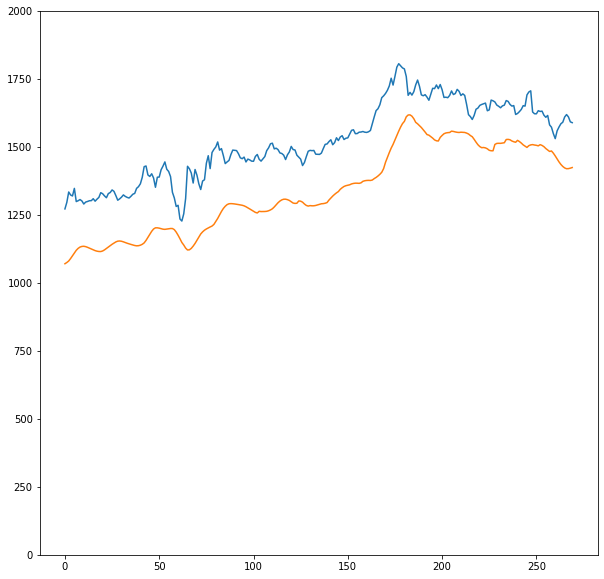

In [109]:
plt.figure(figsize = (10,10))
plt.plot(y_test)
plt.plot(y_pred)
plt.ylim(0, 2000)

#plt.savefig('FINAL_success.png', dpi = 1000)